In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv("extracted_features.csv")

In [3]:
X = df.drop(columns=['pid', 'window10', 'timestamp', 'intoxicated', "Unnamed: 0", "Unnamed: 0.1", 'datetime'], axis=1)
y = df[['intoxicated']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)


In [4]:
train_X = np.asarray(train_X).astype('float32')
test_X = np.asarray(test_X).astype('float32')


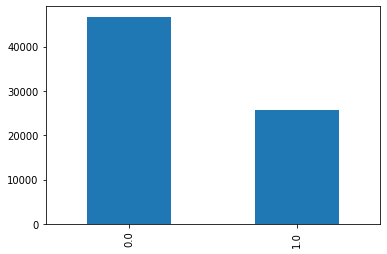

In [5]:
df["intoxicated"].value_counts().plot(kind='bar')
plt.show()

In [6]:
train_X.shape

(54390, 136)

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
model = keras.Sequential([
	keras.layers.Dense(136, activation = 'relu', name = 'l1'),
	keras.layers.Dropout(0.5),
	keras.layers.Dense(128, activation = 'relu', name = 'l2'),
	keras.layers.Dense(64, activation = 'relu', name = 'l3'),
	keras.layers.Dense(32, activation = 'relu', name = 'l31'),
	keras.layers.Dense(16, activation = 'relu', name = 'l32'),
	keras.layers.Dense(10, activation = 'relu', name = 'l4'),
	keras.layers.Dense(1, activation = 'sigmoid', name = 'l5'),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
history =model.fit(x = train_X, y = train_y, batch_size=None, epochs=10, validation_split=0.2 )

Epoch 1/10
1360/1360 [==============================] - 5s 3ms/step - loss: 11068.0732 - accuracy: 0.7811 - val_loss: 0.3724 - val_accuracy: 0.8366
Epoch 2/10
1360/1360 [==============================] - 4s 3ms/step - loss: 1659.7347 - accuracy: 0.8273 - val_loss: 0.3302 - val_accuracy: 0.8304
Epoch 3/10
1360/1360 [==============================] - 4s 3ms/step - loss: 2.8774 - accuracy: 0.8380 - val_loss: 0.2903 - val_accuracy: 0.8781
Epoch 4/10
1360/1360 [==============================] - 5s 4ms/step - loss: 1.0765 - accuracy: 0.8572 - val_loss: 0.2738 - val_accuracy: 0.8782
Epoch 5/10
1360/1360 [==============================] - 5s 4ms/step - loss: 0.2925 - accuracy: 0.8618 - val_loss: 0.2689 - val_accuracy: 0.8756
Epoch 6/10
1360/1360 [==============================] - 5s 4ms/step - loss: 0.2844 - accuracy: 0.8648 - val_loss: 0.2624 - val_accuracy: 0.8757
Epoch 7/10
1360/1360 [==============================] - 5s 4ms/step - loss: 25.4150 - accuracy: 0.8690 - val_loss: 0.2620 - val_a

In [10]:
prediction = model.predict(test_X).round()

In [11]:
f1 = f1_score(prediction, test_y)
accuracy = accuracy_score(prediction, test_y)
rec = recall_score(prediction, test_y)
prec = precision_score(prediction, test_y)
print(f1, accuracy, rec, prec)

0.8230341302059841 0.8701671170922729 0.8031103286384976 0.8439716312056738


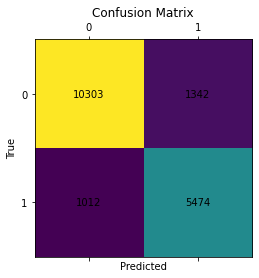

In [12]:
def plot_confusion_matrix(test_y, y_pred):
    """
    Given test_y and y_predictions, plot confusion matrix.
    """
    cm = confusion_matrix(test_y, y_pred)
    fig, ax = plt.subplots()
    ax.matshow(cm)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

    plt.show()
plot_confusion_matrix(test_y, prediction)

In [13]:
print(f1, accuracy, rec	, prec)

0.8230341302059841 0.8701671170922729 0.8031103286384976 0.8439716312056738


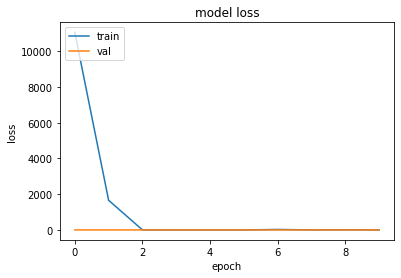

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [15]:
model.evaluate(test_X, test_y)

567/567 [==============================] - 1s 2ms/step - loss: 0.2608 - accuracy: 0.8702


[0.2607855796813965, 0.8701671361923218]